In [274]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [275]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


abstracte:-
first: we have 8 preprocessing steps to describe the data and relationships.
second:we have 8 modeling  steps to train the data.
finally: evaluation model.

1)Read traning data

In [276]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2)Read testing data

In [277]:
# check the missing value
train_data_ckecks =train_data.isnull() 
print(train_data_ckecks)
# 1)check the missing value in names
count_missing_value_in_nams=train_data.Name.isnull().sum()
print (count_missing_value_in_nams)
# 2)check the missing value in sex
count_missing_value_in_sex=train_data.Sex.isnull().sum()
print (count_missing_value_in_sex)
# 3)check the missing value in Age
count_missing_value_in_Age=train_data.Age.isnull().sum()
print (count_missing_value_in_Age)
# 4)check the missing value in sibsp
count_missing_value_in_SibSp=train_data.SibSp.isnull().sum()
print (count_missing_value_in_SibSp)
# 5)check the missing value in Parch
count_missing_value_in_Parch=train_data.Parch.isnull().sum()
print (count_missing_value_in_Parch)
# 6)check the missing value in Ticket
count_missing_value_in_Ticket=train_data.Ticket.isnull().sum()
print (count_missing_value_in_Ticket)
# 7)check the missing value in Fare
count_missing_value_in_Fare=train_data.Fare.isnull().sum()
print (count_missing_value_in_Fare)
# 8)check the missing value in Cabin
count_missing_value_in_Cabin=train_data.Cabin.isnull().sum()
print (count_missing_value_in_Cabin)
# 9)check the missing value in Embarked
count_missing_value_in_Embarked=train_data.Embarked.isnull().sum()
print (count_missing_value_in_Embarked)
# 10)check the missing value in Pclass
count_missing_value_in_Pclass=train_data.Pclass.isnull().sum()
print (count_missing_value_in_Pclass)




     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

3)important to conseder ang missing value in the colums 
we have 3 attributs with missing values.
a)cabin number is the heighest missing valuse 
b)then the Age which is the most important attribute 
c)then the Embarked places 
this step to determin whic attribute we fillin its missing values 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

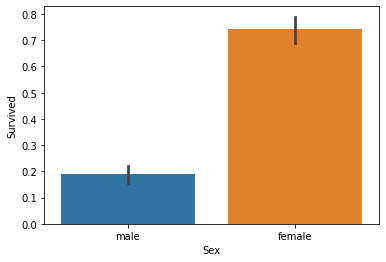

In [278]:
sns.barplot(x='Sex',y='Survived',data=train_data)

4)to chose the most effective valuse in the model 
so sex is the siutable one to compare it with others. 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

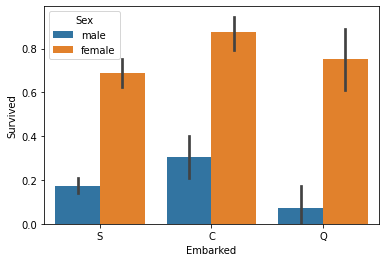

In [279]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=train_data)

5)compare the Embarked dependent on sex.
 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

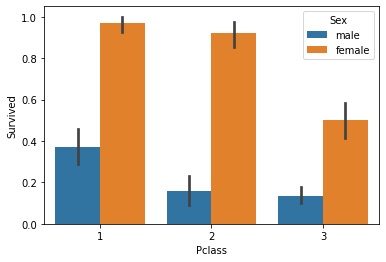

In [280]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data)

5)compare the Pclass dependent on sex.
 

In [281]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6)describe the data before filling the misssing valuse 

In [282]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


7)We have to deal with age missing value as it is important factor in the procss.
we have 2 methods as Dr mahmode siad 
1)fill with the median value 
2)fill with the avarage value
here we use the most repeated value (median)
as we can sea the std and mean value increase 

In [283]:
count_missing_value_in_Age=train_data.Age.isnull().sum()
print (count_missing_value_in_Age)

0


8)make sure that there is no missing value

In [284]:
train_data.Embarked = train_data.Embarked.fillna('S')
train_data.loc[train_data.Embarked == 'S','Embarked'] = 0
train_data.loc[train_data.Embarked == 'C','Embarked'] = 1
train_data.loc[train_data.Embarked == 'Q','Embarked'] = 2
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


8)we can not deal with the non numiric valuse in the model so we have to change it to numiric valuse to make it easy to deal with.here we have there diffrent cat.

In [285]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

1)load the library of the model

In [286]:
#split dataset in features and target variable
feature_cols = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = train_data[feature_cols] # Features
y = train_data.Survived # Target variable

2)split dataset in features and target variable(lables,classes)
note:i only use the important attribut and leave the non important featurse which is complex to deal with it in the model.

In [287]:
#traning data
train_data.Embarked = train_data.Embarked.fillna('S')
train_data.loc[train_data.Embarked == 'S','Embarked'] = 0
train_data.loc[train_data.Embarked == 'C','Embarked'] = 1
train_data.loc[train_data.Embarked == 'Q','Embarked'] = 2
train_data.Sex = train_data.Sex.fillna('S')
train_data.loc[train_data.Sex == 'male','Sex'] = 0
train_data.loc[train_data.Sex == 'female','Sex'] = 1
feature_cols = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_data.Age = train_data.Age.fillna(train_data.Age.median())
train_data.Embarked= train_data.Embarked.fillna(train_data.Embarked.median())
X = train_data[feature_cols] # Features
y = train_data.Survived # Target variable
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


3)convert strint to numiric 
4)fill the missing valuse 

In [288]:

#test data
test_data.Embarked = test_data.Embarked.fillna('S')
test_data.loc[test_data.Embarked == 'S','Embarked'] = 0
test_data.loc[test_data.Embarked == 'C','Embarked'] = 1
test_data.loc[test_data.Embarked == 'Q','Embarked'] = 2
test_data.Sex = test_data.Sex.fillna('S')
test_data.loc[test_data.Sex == 'male','Sex'] = 0
test_data.loc[test_data.Sex == 'female','Sex'] = 1
test_data.Age = test_data.Age.fillna(test_data.Age.median())
test_data.Embarked= test_data.Embarked.fillna(test_data.Embarked.median())
test_data.Fare= test_data.Fare.fillna(test_data.Fare.median())
feature_cols_test = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_test = test_data[feature_cols_test]
test_data.head()
#here error appeares there is nan value so i have to count all attribute's valuse to dedect the error;) 
count_missing_value_in_PassengerId=X_test.PassengerId.isnull().sum()
print (count_missing_value_in_PassengerId)
count_missing_value_in_Pclass=X_test.Pclass.isnull().sum()
print (count_missing_value_in_Pclass)
count_missing_value_in_Sex=X_test.Sex.isnull().sum()
print (count_missing_value_in_Sex)
count_missing_value_in_Age=X_test.Age.isnull().sum()
print (count_missing_value_in_Age)
count_missing_value_in_SibSp=X_test.SibSp.isnull().sum()
print (count_missing_value_in_SibSp)
count_missing_value_in_Parch=X_test.Parch.isnull().sum()
print (count_missing_value_in_Parch)
count_missing_value_in_Fare=X_test.Fare.isnull().sum()
print (count_missing_value_in_Fare)
count_missing_value_in_Embarked=X_test.Embarked.isnull().sum()
print (count_missing_value_in_Embarked)
print (y_pred)

0
0
0
0
0
0
0
0
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


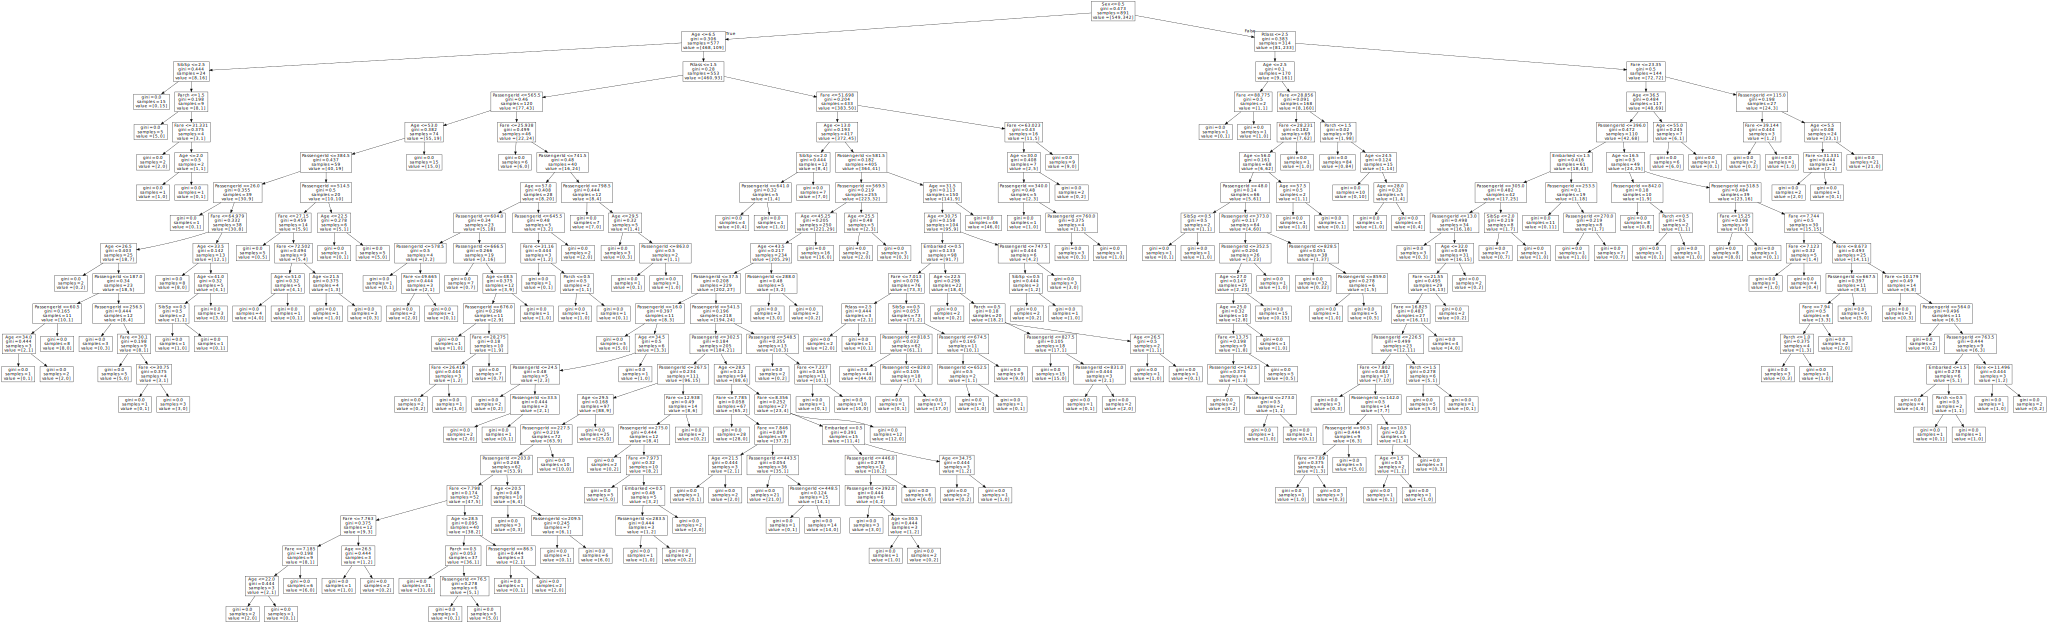

In [289]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = export_graphviz(dtree,feature_names=feature_cols,out_file=None)
graph = graphviz.Source(data)
graph

5)drow the tree

In [290]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X,y)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print (y_pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


7)use the tree to predict the output of testing data
note:here i print it to make sure the output is correct .

In [291]:
#finall result 
finall =pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_pred})
finall.to_csv('Ahlam.csv',index=False)


8)creat csv file to save the predict valuse and test.

In [292]:
#evaluation model
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
feature_cols = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = train_data[feature_cols] # Features
y = train_data.Survived # Target variable
lin_model_cv = cross_val_score(lin_reg,X,y,cv=5)
print("RSquare: %0.2f (+/- %0.2f)" % (lin_model_cv.mean(), lin_model_cv.std() * 2))

RSquare: 0.37 (+/- 0.09)


finally use evaluation model to evaluate the mode .Here I use the K-mean cross scoure.
with k=5.The resuslt is not satisfed.

thanks;)